# Assginment (2023-06-22 ~ 2023-06-26 14:00)

## 3. `arib` Dataset

- import *module*

In [1]:
import pandas as pd
import os

- set the *data directory*

In [2]:
data_dir = '/NasData/home/knh/review/data/'
air_dir = os.path.join(data_dir, 'airb')

In [3]:
print(air_dir)

/NasData/home/knh/review/data/airb


In [4]:
print(os.listdir(air_dir))

['AirBNBReviews.csv']


### 1. Load the data from the csv file

- use `pd.read_csv()` function

In [5]:
airb_csv = os.path.join(air_dir, 'AirBNBReviews.csv')

In [6]:
print(airb_csv)

/NasData/home/knh/review/data/airb/AirBNBReviews.csv


In [7]:
print("Check in csv file: ", os.path.isfile(airb_csv))

Check in csv file:  True


In [8]:
airb_df = pd.read_csv(airb_csv)

In [9]:
print(airb_df)

                 Genre                                             Review  \
0             Location  The location of this Airbnb was perfect, close...   
1          Cleanliness  The cleanliness of the Airbnb was outstanding,...   
2         Neighborhood  The neighborhood where this Airbnb is situated...   
3             Security  I felt completely safe and secure during my st...   
4     Pet Friendliness  They were so welcoming to my pet, it felt like...   
..                 ...                                                ...   
349               Host  Unfortunately, the host was unresponsive and l...   
350               Host  I experienced difficulties in reaching the hos...   
351               Host  The host was unaccommodating and did not adequ...   
352               Host  I felt unwelcome by the host, with minimal com...   
353               Host  The host was unhelpful and showed a lack of in...   

     Positive or Negative  
0                     1.0  
1                  

In [10]:
airb_df

,Genre,Review,Positive or Negative
0,Location,"The location of this Airbnb was perfect, close...",1.0
1,Cleanliness,"The cleanliness of the Airbnb was outstanding,...",1.0
2,Neighborhood,The neighborhood where this Airbnb is situated...,1.0
3,Security,I felt completely safe and secure during my st...,1.0
4,Pet Friendliness,"They were so welcoming to my pet, it felt like...",1.0
...,...,...,...
349,Host,"Unfortunately, the host was unresponsive and l...",0.0
350,Host,I experienced difficulties in reaching the hos...,0.0
351,Host,The host was unaccommodating and did not adequ...,0.0
352,Host,"I felt unwelcome by the host, with minimal com...",0.0


In [11]:
print(airb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Genre                 341 non-null    object 
 1   Review                341 non-null    object 
 2   Positive or Negative  341 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.4+ KB
None


### 2. Check the label distribution

- use `.groupby()` function

In [12]:
label_distribution = airb_df.groupby(['Genre', 'Positive or Negative']).size()

print(label_distribution)

Genre              Positive or Negative
 Cleanliness       0.0                     39
                   1.0                     19
 Host              0.0                     38
                   1.0                     18
 Location          0.0                     38
                   1.0                     18
 Neighborhood      0.0                     38
                   1.0                     19
 Pet Friendliness  0.0                     38
                   1.0                     19
 Security          0.0                     38
                   1.0                     19
dtype: int64


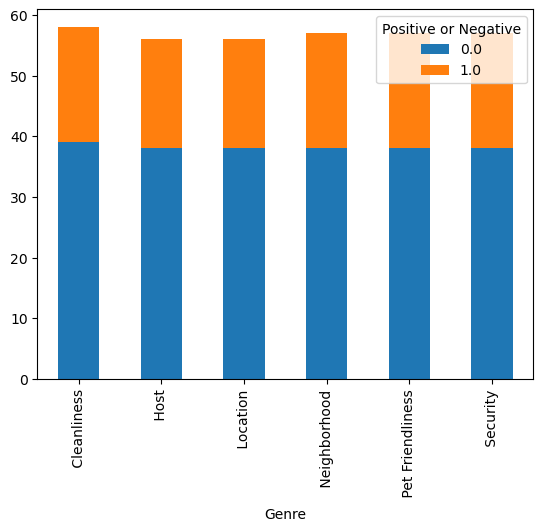

In [13]:
import matplotlib.pyplot as plt

airb_df.groupby(['Genre', 'Positive or Negative']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

### 3. Check the missing values

- use `.isnull()` function

In [14]:
missing_value = airb_df.isnull().sum()

print(missing_value)

Genre                   13
Review                  13
Positive or Negative    13
dtype: int64


### 4. Convert to Token from Text

In [15]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

/NasData/home/knh/anaconda3/envs/mlcl/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
text_128 = airb_df['Review'][127]
text_128

"I didn't feel comfortable leaving my belongings unattended in the Airbnb due to inadequate security. "

In [17]:
text_256 = airb_df['Review'][255]
text_256

'The neighborhood had a reputation for thefts, affecting my peace of mind. '

In [24]:
text_custom_1 = "Today is a heat wave warning."
text_custom_2 = "How beautiful the back of a person who knows when to go is!"
print(text_custom_1)
print(text_custom_2)

Today is a heat wave warning.
How beautiful the back of a person who knows when to go is!


#### 1. Encode The Review Text

In [20]:
def tokenize_text(text):
    text_to_token = tokenizer(text)
    return text_to_token

In [21]:
for text in [text_128, text_256, text_custom_1, text_custom_2]:
    print(text)
    text_to_token = tokenize_text(text)
    print(text_to_token)
    print('------------------')

I didn't feel comfortable leaving my belongings unattended in the Airbnb due to inadequate security. 
{'input_ids': [101, 151, 30557, 112, 162, 23333, 66493, 13356, 20105, 11153, 49909, 10107, 10155, 23708, 20298, 10104, 10103, 11140, 10417, 55216, 10875, 10114, 20150, 10282, 61420, 15636, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
------------------
The neighborhood had a reputation for thefts, affecting my peace of mind. 
{'input_ids': [101, 10103, 32240, 10407, 143, 31514, 10139, 49601, 10107, 117, 56365, 10285, 11153, 16534, 10108, 15849, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
------------------
Today is a heat wave warning.
{'input_ids': [101, 13980, 10127, 143, 20658, 21560, 39983, 119, 10

#### 2. Decode The Review Text from Token

In [22]:
def decode_token(token):
    token_to_text = tokenizer.decode(token["input_ids"])
    return token_to_text


In [23]:
for text in [text_128, text_256, text_custom_1, text_custom_2]:
    print(text)
    text_to_token = tokenize_text(text)
    print(text_to_token)
    token_to_text = decode_token(text_to_token)
    print(token_to_text)
    print('------------------')

I didn't feel comfortable leaving my belongings unattended in the Airbnb due to inadequate security. 
{'input_ids': [101, 151, 30557, 112, 162, 23333, 66493, 13356, 20105, 11153, 49909, 10107, 10155, 23708, 20298, 10104, 10103, 11140, 10417, 55216, 10875, 10114, 20150, 10282, 61420, 15636, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
[CLS] i didn't feel comfortable leaving my belongings unattended in the airbnb due to inadequate security. [SEP]
------------------
The neighborhood had a reputation for thefts, affecting my peace of mind. 
{'input_ids': [101, 10103, 32240, 10407, 143, 31514, 10139, 49601, 10107, 117, 56365, 10285, 11153, 16534, 10108, 15849, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
[CL